In [20]:
import numpy as np
import matplotlib.pyplot as plt

import preprocessing as prep
import visualization as vis
from filtering import LPF
import csv

In [21]:
DATA_DIR = "titan-hf-4"

SENSORS = {"b_load_1": "LC1 Axial Load",
           "pres_1": "PT1 Combustion Chamber Pressure",
           "pres_2": "PT2 Feedline Pressure",
           "pres_3": "PT3 Injector Pressure",
           "pres_4": "PT4 Ox-Tank Pressure"}

DRIVERS = {0: {"name": "Ox Fill", "False": "Close", "True": "Open"},
           1: {"name": "Ground Vent", "False": "Close", "True": "Open"},
           2: {"name": "Ops Pressurization", "False": "Open", "True": "Close"},
           3: {"name": "Engine Vent", "False": "Open", "True": "Close"}}

In [22]:
print("Processing events")
prep.process_events_hf4(DATA_DIR, DRIVERS)
print("Processing data")
prep.process_data(DATA_DIR, SENSORS)
print("Done!")

Processing events
Processing data
Done!


In [23]:
events = prep.import_events(DATA_DIR)
labels, data = prep.import_data(DATA_DIR, events)
times = data[:, 0]

print(f"HF4 Data Summary \n----------------- \n Sensors: {len(labels) - 1} \n" f" Samples: {len(times)} \n Events:  {len(events)}")

HF4 Data Summary 
----------------- 
 Sensors: 5 
 Samples: 2148001 
 Events:  59


In [24]:
ep = vis.EventPlotter(data, events, dpi=100)
lpf = LPF(fs=300, length=101, cutoff=10, window="blackman")

6509.0
1952700
[-24.03958 -22.73858 -27.94258 ... -25.34058 -24.03958 -27.94258]


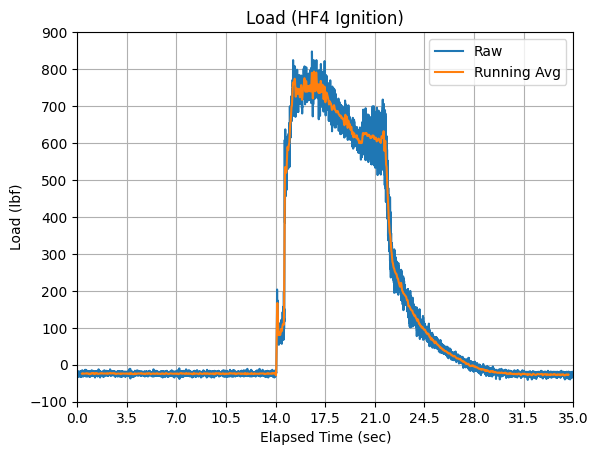

In [29]:
ep.plot(sensor_id=1, event_id=56, duration=35, filter=lpf,
        title="Load (HF4 Ignition)", ylabel="Load (lbf)",
        num_xticks=11, dif_yticks=100)

6509.0
1952700
[-24.03958 -22.73858 -27.94258 ... -25.34058 -24.03958 -27.94258]


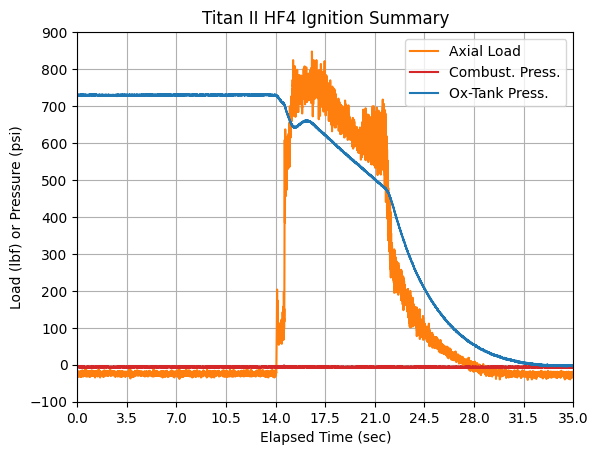

In [30]:
ep.plot(sensor_id=1, event_id=56, duration=35, filter=None,
        title="Titan II HF4 Ignition Summary", ylabel="Load (lbf) or Pressure (psi)",
        legend="Axial Load", num_xticks=11, dif_yticks=100, color="tab:orange")
ep.add_curve(sensor_id=2, event_id=56, duration=35, legend="Combust. Press.",
             color="tab:red")
ep.add_curve(sensor_id=5, event_id=56, duration=35, legend="Ox-Tank Press.", 
             color="tab:blue")
plt.show()

In [33]:
print(data)

[[ 0.00000000e+00  1.98141000e+00 -3.95741000e+00 -7.10117000e+00
  -3.15431000e+00 -4.01590000e-01]
 [ 3.33000000e-03 -6.20590000e-01 -5.78778000e+00 -1.12610700e+01
  -2.80301000e+00 -7.34390000e-01]
 [ 6.67000000e-03  4.58341000e+00 -5.28859000e+00 -1.14274700e+01
  -3.50558000e+00 -1.39997000e+00]
 ...
 [ 7.15999333e+03 -3.57490700e+01 -6.78615000e+00 -9.76351000e+00
  -3.68122000e+00 -3.72951000e+00]
 [ 7.15999667e+03 -3.18455800e+01 -6.45336000e+00 -8.59874000e+00
  -3.50558000e+00 -2.89754000e+00]
 [ 7.16000000e+03 -3.31465800e+01 -5.78778000e+00 -1.07618900e+01
  -3.85685000e+00 -3.23032000e+00]]


In [41]:
time_start = float(events[56]["secs"])
time_end = time_start + 35
sample_start = vis.nearest_sample(data, time_start)
sample_end = vis.nearest_sample(data, time_end)

times_event = [t - time_start for t in times[sample_start : sample_end]]
data_event = data[sample_start : sample_end, 1]
offset = np.mean(data_event[0:4200])
print(len(data_event))

impulse_total = 0
for sample in data_event[4200:]:
    impulse_total += (sample - offset) / 300

impulse_main = 0
for sample in data_event[4200:6600]:
    impulse_main += (sample - offset) / 300

peak_thrust = max(data_event) - offset
peak_sustained_thrust = np.mean(data_event[int(300*15.25) : int(300*15.3)]) - offset
avg_thrust = impulse_main / ((6600 - 4200) / 300)

print(f"Peak Thrust:\t\t  {peak_thrust:.2f}  lbf")
print(f"Peak Sustained Thrust:\t   {peak_sustained_thrust:.2f}  lbf")
print(f"Avg Thrust @ Supersonic:   {avg_thrust:.2f}  lbf")
print(f"Impulse @ Supersonic:\t  {impulse_main:.2f}  lb-sec")
print(f"Total Impulse:\t\t  {impulse_total:.2f}  lb-sec")

10500
Peak Thrust:		  871.58  lbf
Peak Sustained Thrust:	   783.55  lbf
Avg Thrust @ Supersonic:   647.63  lbf
Impulse @ Supersonic:	  5181.07  lb-sec
Total Impulse:		  5919.21  lb-sec


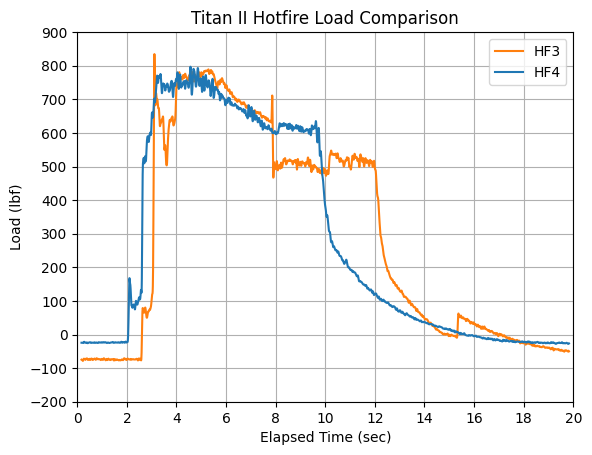

In [51]:
lpf = LPF(fs=300, length=51, cutoff=15, window="blackman")

DATA_DIR_HF3 = "titan-hf-3"
events_hf3 = prep.import_events(DATA_DIR_HF3)
label_hf3, data_hf3 = prep.import_data(DATA_DIR_HF3, events_hf3)
times_hf3 = data_hf3[:, 0]

time_start = float(events[56]["secs"])+12
time_end = time_start + 20
sample_start = vis.nearest_sample(data, time_start)
sample_end = vis.nearest_sample(data, time_end)
times_event = [t - time_start for t in times[sample_start:sample_end]]
data_event = data[sample_start:sample_end, 1]

time_start_hf3 = float(events_hf3[52]["secs"]) + 1
time_end_hf3 = time_start_hf3 + 20
sample_start_hf3 = vis.nearest_sample(data_hf3, time_start_hf3)
sample_end_hf3 = vis.nearest_sample(data_hf3, time_end_hf3)
times_event_hf3 = [t - time_start_hf3 for t in times_hf3[sample_start_hf3:sample_end_hf3]]
data_event_hf3 = data_hf3[sample_start_hf3:sample_end_hf3, 1]

plt.figure(dpi=100)
plt.plot(times_event_hf3[51:-51],
         lpf.apply(data_event_hf3)[51:-51],
         label="HF3", c="tab:orange")
plt.plot(times_event[51:-51],
         lpf.apply(data_event)[51:-51],
         label="HF4", c="tab:blue")
plt.legend(); plt.grid()
plt.title("Titan II Hotfire Load Comparison")
plt.xlabel("Elapsed Time (sec)"); plt.ylabel("Load (lbf)")
plt.xlim((0, 20)); plt.ylim((-200, 900))
plt.xticks(range(0, 22, 2)); plt.yticks(range(-200, 1000, 100))
plt.show()